In [1]:
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import keras

In [2]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [3]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

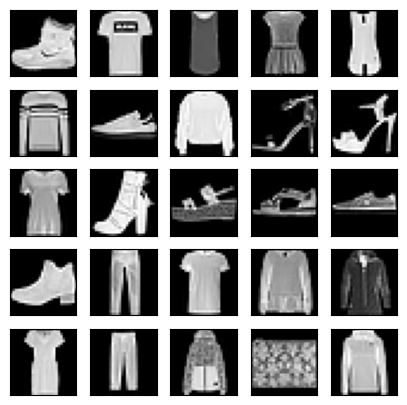

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

In [5]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu',),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.6006 - loss: 1.0775 - val_accuracy: 0.8322 - val_loss: 0.4561
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8202 - loss: 0.4973 - val_accuracy: 0.8568 - val_loss: 0.3907
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8490 - loss: 0.4202 - val_accuracy: 0.8802 - val_loss: 0.3328
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8669 - loss: 0.3710 - val_accuracy: 0.8824 - val_loss: 0.3054
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8781 - loss: 0.3387 - val_accuracy: 0.8892 - val_loss: 0.2945
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8856 - loss: 0.3210 - val_accuracy: 0.8927 - val_loss: 0.2807
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.8895 - loss: 0.3050 - val_accuracy: 0.8992 - val_loss: 0.2684
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8949 - loss: 0.2880 - 

In [8]:
test_loss, test_accuracy  = model.evaluate(test_images, test_labels)
print('Test loss: {0:.2f}. Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9148 - loss: 0.2478
Test loss: 0.24. Test Accuracy: 91.55%


In [9]:
import tensorflow as tf

# Save the model in SavedModel format
tf.saved_model.save(model, "fashion_mnist_cnn_model")


INFO:tensorflow:Assets written to: fashion_mnist_cnn_model\assets


INFO:tensorflow:Assets written to: fashion_mnist_cnn_model\assets
